# **Group 3 Project: store_data.csv**

<a id='toc'></a>
## Table of Contents

<ul>
<li><a href="#toc">Table of Contents</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#de">Data Exploring</a></li>
<li><a href="#conclude">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

`Store_data.csv` is a dataset that stores the weekly sales of five stores, namely storeA, storeB, storeC, and StoreD. This dataset is collected for four years from 2014 to 2018. Some questions that can be explored from this dataset are:

1. What is the total sales for the last month?
2. What is the average sales across all stores?
3. What is the sales on March 13, 2016?
4. When is worst week of Store C?
5. How much are the total sales from the most recent 3 months?

<a id='wrangle'></a>
## Data Wrangling

### 1. Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### 2. Gathering the data

In [2]:
df = pd.read_csv('store_data.csv')
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


### 3. Assessing for possible problems

In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null object
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


> From this step, several insights regarding the dataset can be obtained. (1) It has 200 rows and 6 columns, meaning that, for each store, weekly sales were recorded for 200 weeks, (2) 'Week' column shows the date when the sales are recorded and the data type is 'object', and (3) Other columns aside of 'week' show the  sales recorded in each store and its data type is 'integer.'

> Another important insight acquired from this step is that all total observations for each column are 200 observations. This implies that there is no missing values in the dataset. There is also no duplicate value in every columns.

> However, there is still a potential problem: in the 'week' column, the data format is 'object.' In order to conduct time-series analysis, it will be more convenient to tell Pandas that this column is a time indicator.

### 4. Cleaning the dataset

In [5]:
# Convert 'week' colum to 'datetime'-type data.
df_copy = df.copy()

In [6]:
df_copy['week'] = pd.to_datetime(df_copy['week'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null datetime64[ns]
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 9.5 KB


> Now, the 'week' column is in 'datetime' format.

<a id='de'></a>
## Data Exploring

### 1. Get a glimpse of the dataset

In [7]:
# Convert 'week' to index
df_copy = df_copy.set_index('week')
df_copy.head()

,storeA,storeB,storeC,storeD,storeE
week,,,,,
2014-05-04,2643,8257,3893,6231,1294
2014-05-11,6444,5736,5634,7092,2907
2014-05-18,9646,2552,4253,5447,4736
2014-05-25,5960,10740,8264,6063,949
2014-06-01,7412,7374,3208,3985,3023


In [8]:
df_datetime = df.copy()
df_datetime['week'] = pd.to_datetime(df_datetime['week'])

In [9]:
df_datetime['week'].dt.day_name().unique()

array(['Sunday'], dtype=object)

>Another important feature of the dataset: The sales data were collected weekly and reported every Sunday.

In [10]:
# get count, mean, std, min, max, and the quantiles
df_copy.describe()

,storeA,storeB,storeC,storeD,storeE
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5865.480000,6756.710000,4942.105000,5431.405000,2580.025000
std,2958.230318,3601.339489,1325.407768,1183.111323,1725.651381
min,137.000000,14.000000,927.000000,2276.000000,39.000000
25%,3812.250000,3884.500000,4053.500000,4717.000000,1235.000000
50%,5713.500000,6771.000000,4962.500000,5382.000000,2522.000000
75%,7662.250000,9350.500000,5801.750000,6243.750000,3574.250000
max,14403.000000,15841.000000,8293.000000,8190.000000,7553.000000


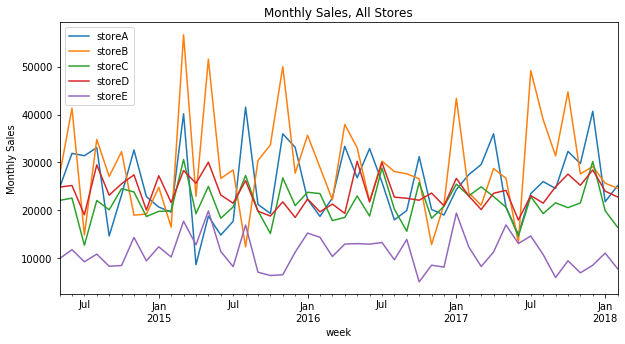

In [11]:
# Plot monthly sales
df_copy.resample('m').sum().plot(
    kind='line', 
    figsize=(10,5),
    title="Monthly Sales, All Stores"
    )
plt.ylabel('Monthly Sales');

>Insights obtained from the graph:

>1. The trends: fluctuate, movements between lines seem similar.
>2. Store with the least total monthly sales is storeE.

### <span style="color:red">Question 1</span>: What is the total sales for the last month?

In [12]:
totsales_lastmonth = df_copy.resample('m').sum().tail(1).sum(axis=1).sum()
totsales_lastmonth

96739

In [13]:
answer1 = (
    'The total sales of the last month, which was in ' + 
    df_copy.tail(1).index[0].strftime('%B %Y') + 
    ', is ' + 
    str(totsales_lastmonth) + 
    ' sales.'
    )

In [14]:
print(answer1)

The total sales of the last month, which was in February 2018, is 96739 sales.


### <span style="color:red">Question 2</span>: What is the average sales across all stores?

In [15]:
avsales = df_copy.mean().mean().round(2)
avsales

5115.14

In [16]:
answer2 = (
    'The average sales of all stores is ' + 
    str(avsales) + 
    ' sales.'
    )

In [17]:
print(answer2)

The average sales of all stores is 5115.14 sales.


### <span style="color:red">Question 3</span>: What is the sales on March 13, 2016?

In [18]:
sales_20160313 = df_copy.loc['2016-03-13'].sum()
sales_20160313

16605

In [19]:
answer3 = (
    'The total sales for 13th March 2016 is ' + 
    str(sales_20160313) + 
    ' sales.'
    )

In [20]:
print(answer3)

The total sales for 13th March 2016 is 16605 sales.


### <span style="color:red">Question 4</span>: When is worst week of Store C?

In [21]:
leastsales_storeC = df_copy[df_copy['storeC']==df_copy['storeC'].min()].index[0].strftime('%B %d, %Y')
leastsales_storeC

'July 06, 2014'

In [22]:
answer4 = (
    'The worst week for Store C occured on ' + 
    leastsales_storeC + 
    '.'
    )

In [23]:
print(answer4)

The worst week for Store C occured on July 06, 2014.


### <span style="color:red">Question 5</span>: How much are the total sales from the most recent 3 months?

In [24]:
totsales_last3month = df_copy.resample('m').sum().tail(3).sum(axis=1).sum()
totsales_last3month

336047

In [25]:
answer5 = (
    'The total sales for the last three months is ' + 
    str(totsales_last3month) + 
    ' sales.'
    )

In [26]:
print(answer5)

The total sales for the last three months is 336047 sales.


In [27]:
# create answer list
answer_list = [answer1, answer2, answer3, answer4, answer5]

<a id='conclude'></a>
## Conclusions

In [28]:
print("In conclusion, to address all the questions offered in the beginning, it can be concluded that:")

for answer in answer_list:
    print(answer_list.index(answer) + 1, end=' ')
    print(' ', answer)

In conclusion, to address all the questions offered in the beginning, it can be concluded that:
1   The total sales of the last month, which was in February 2018, is 96739 sales.
2   The average sales of all stores is 5115.14 sales.
3   The total sales for 13th March 2016 is 16605 sales.
4   The worst week for Store C occured on July 06, 2014.
5   The total sales for the last three months is 336047 sales.
